In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [17]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [18]:
df.shape

(200, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [21]:
# Encode Gender col
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

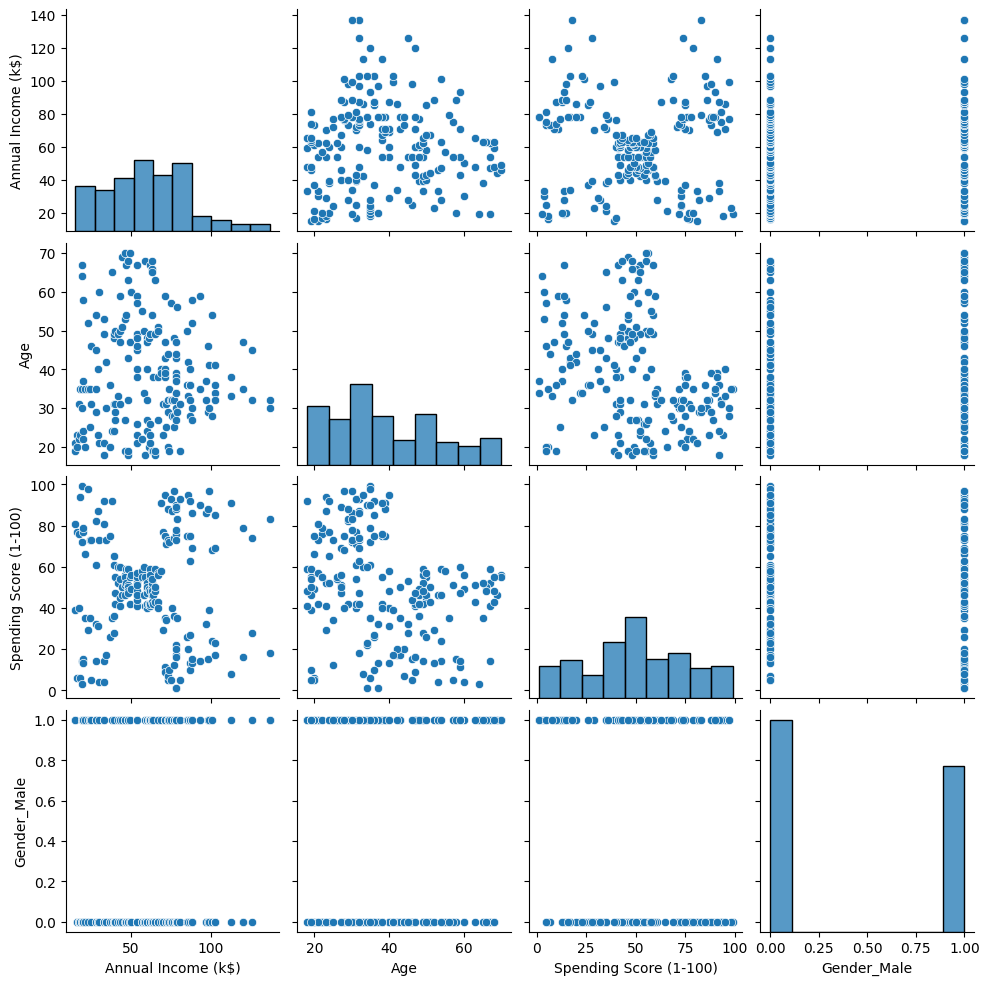

In [22]:
# Explore Data Distribution
sns.pairplot(df_encoded[['Annual Income (k$)', 'Age', 'Spending Score (1-100)', 'Gender_Male']])
plt.show()


In [23]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[['Annual Income (k$)', 'Age', 'Spending Score (1-100)', 'Gender_Male']])


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

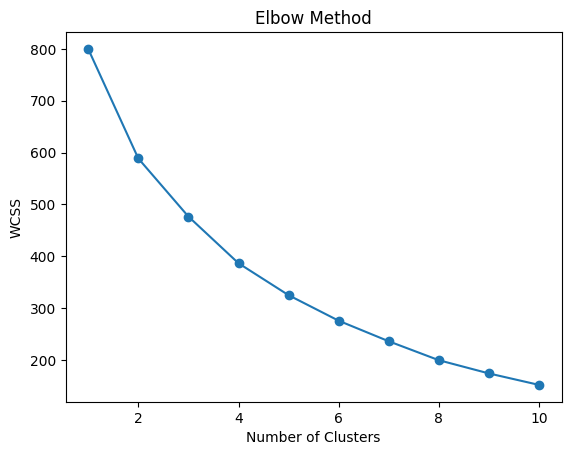

In [24]:
# Determine the Number of Clusters K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
# Based on the Elbow method,the optimal number of clusters choosed is 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_data)


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Analyze the characteristics of each cluster
cluster_summary = df_encoded.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0        104.958333  49.437500           62.416667               29.208333   
1        100.210526  28.438596           59.666667               67.684211   
2         94.818182  48.109091           58.818182               34.781818   
3        103.375000  28.250000           62.000000               71.675000   

         Gender_Male  
Cluster               
0                1.0  
1                0.0  
2                0.0  
3                1.0  


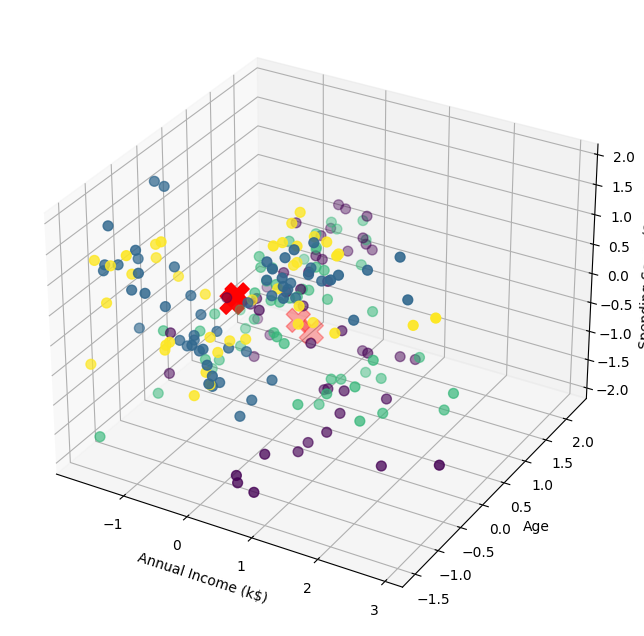

In [27]:
# Visualize the clusters in the 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=df_encoded['Cluster'], cmap='viridis', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')
plt.show()


Results :
    
The customer segmentation results reveal four groups with distinct characteristics. Cluster 0, mainly older males, has a lower spending score despite a decent income. Cluster 1, younger females, shows a higher spending score with a slightly lower income. Cluster 2, primarily older females, has a moderate spending score. Cluster 3, younger males, displays a higher income and substantial spending. These insights suggest potential marketing strategies, such as emphasizing value for Clusters 0 and 2, and targeting specific products to high-spending segments in Clusters 1 and 3.

conclusion : 
These clusters provide valuable insights for targeted marketing strategies. Cluster 0 and 2, consisting of older individuals, may benefit from value-driven offerings, considering their lower spending propensity. On the other hand, Clusters 1 and 3, representing younger demographics, present opportunities for marketing higher-spending products. 